In [1]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# 1) Transform the image with arbitrary angle and scale
img = Image.open('Image/lena.bmp').convert('L')
img = np.array(img)
h, w = img.shape

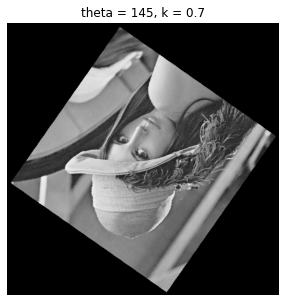

In [3]:
tx, ty = w//2, h//2 
theta = np.radians(145)
k = 0.7

RMat = np.array([[math.cos(theta), math.sin(theta),0],
                 [-math.sin(theta),  math.cos(theta),0],
                 [              0,                0,1]])
SMat = np.array([[k,0,0], [0,k,0], [0,0,1]])
TMat = np.array([[1,0,tx], [0,1,ty], [0,0,1]])
TMat_inv = np.linalg.inv(TMat)
finalMat =  TMat @ RMat @ SMat @ TMat_inv 

transformedImage = np.zeros((h,w))
for i in range(h):     # y
    for j in range(w): # x
        point = finalMat @ np.transpose([j,i,1]) # x,y,1
        toX = round(point[0]/point[2])
        toY = round(point[1]/point[2])
        if toX>=0 and toX<w and toY>=0 and toY<h:
            transformedImage[toY,toX] = img[i][j]

plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('theta = 145, k = 0.7')
plt.imshow(transformedImage, cmap='gray')

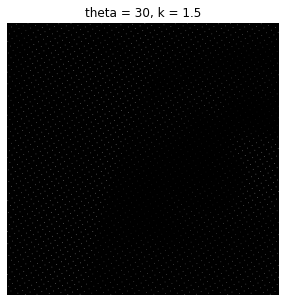

In [4]:
tx, ty = w//2, h//2 
theta = np.radians(30)
k = 10
# Rotation Matrix
RMat = np.array([[math.cos(theta), math.sin(theta),0],
                 [-math.sin(theta),  math.cos(theta),0],
                 [              0,                0,1]])
# Scaling Matrix
SMat = np.array([[k,0,0], [0,k,0], [0,0,1]])
#  Translation Matrix
TMat = np.array([[1,0,tx], [0,1,ty], [0,0,1]])
#  inverse Translation Matrix (원점으로 위치시킴)
TMat_inv = np.linalg.inv(TMat)
# 이미지 중심의 원점이동 -> 스케일링 -> 회전 -> 중심 원위치
finalMat =  TMat @ RMat @ SMat @ TMat_inv 

transformedImage = np.zeros((h,w))
for i in range(h):     # y
    for j in range(w): # x
        point = finalMat @ np.transpose([j,i,1]) # x,y,1
        toX = round(point[0]/point[2])
        toY = round(point[1]/point[2])
        if toX>=0 and toX<w and toY>=0 and toY<h:
            transformedImage[toY,toX] = img[i][j]

plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('theta = 30, k = 1.5')
plt.imshow(transformedImage, cmap='gray')

In [5]:
# 2) Use the nearest neighborhood (NN) and bilinear method for interpolation
# nearest neighborhood (NN) interpolation
def NNinterpolation(t_img, img, tMat):
    h, w = img.shape
    t_img2 = t_img.copy() 
    tMat_inv = np.linalg.inv(tMat)
    for i in range(h): # y
        for j in range(w): # x
            if t_img2[i][j]==0:
                point = tMat_inv @ np.transpose([j,i,1])
                y = round(point[1]/point[2])
                x = round(point[0]/point[2])
                if x>=0 and x<w and y>=0 and y<h:
                    t_img2[i][j] = img[y][x]
    return t_img2

# bilinear method interpolation
def bilinearInterpolation(t_img,img,tMat):
    h, w = img.shape
    t_img2 = t_img.copy() 
    tMat_inv = np.linalg.inv(tMat)
    for i in range(h): # y
        for j in range(w): # x
            if t_img2[i][j]==0:
                point = tMat_inv @ np.transpose([j,i,1])
                x = point[0]/point[2]
                y = point[1]/point[2]
                x1, y1 = math.floor(x), math.floor(y)
                x2, y2 = x1 + 1, y1 + 1
                a = x-x1
                b = y-y1
                value = (1-a) * ( (1-b)*img[y1,x1] + b*img[y1, x2] ) \
                                       + a * ((1-b) * img[y2,x1]  + b*img[y2, x2])
                t_img2[i][j] = value      
    return t_img2

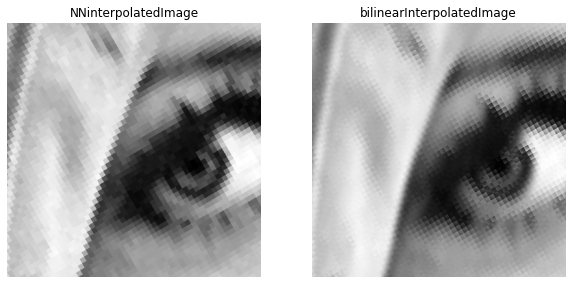

In [6]:
NNinterpolatedImage = NNinterpolation(transformedImage,img,finalMat)
bilinearInterpolatedImage = bilinearInterpolation(transformedImage,img,finalMat)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('NNinterpolatedImage')
plt.axis('off')
plt.imshow(NNinterpolatedImage, cmap='gray')
plt.subplot(1,2,2)
plt.title('bilinearInterpolatedImage')
plt.axis('off')
plt.imshow(bilinearInterpolatedImage, cmap='gray')

Text(0.5, 1.0, 'bilinear')

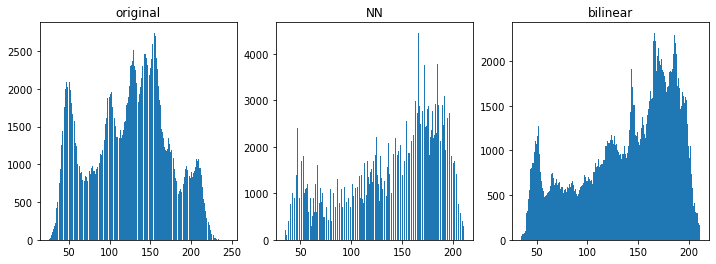

In [7]:
# 3) Compare the interpolation results. 
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(img.ravel(), 256)
plt.title('original')
plt.subplot(1,3,2)
plt.hist(NNinterpolatedImage .ravel(), 256)
plt.title('NN')
plt.subplot(1,3,3)
plt.hist(bilinearInterpolatedImage.ravel(), 256)
plt.title('bilinear')